<a href="https://colab.research.google.com/github/Fellipedantas/projetos/blob/master/Plano_de_sa%C3%BAde.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Prevendo preço de Plano de saúde**


# O Brasil totalizou **48.566.216** beneficiários no final de setembro de 2021. Este é o maior número de usuários desde Abril de 2016. Conforma a ANS ( Agencia Nacional de saúde suplemnetar ). Mesmo assim, **60% doas brasileiros**, aproximadamente não possuem plano de saúde. 

  **  1º problema de negócio**

# desenvolver uma metodologia para previsão do valor do plano de saúde para seus benefciários


**2° Anãlise Exploratória**


**3° Pré-processamento dos dados**

**4° e 5° construção e avaliaçao da Máquina Preditiva**

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# carregando o dataset:

train_data = pd.read_csv("/content/drive/MyDrive/ProjetoS DS/Train_Data.csv")
train_data.head()

# foram escolhidos essas variávies pois geralmente idosos vão mais a hospital.
# mulheres cuidam mas da súde do que os homens.
# se fuma ou não
# IMC, os obeso tem mais propenção a doenças
# Regiões, pois existe lugares mas carentes no Brasil
# e se tem filhos ou não
# usando o charges, vamos prever o valor dos planos de saúde

,age,sex,bmi,smoker,region,children,charges
0,21.000000,male,25.745000,no,northeast,2,3279.868550
1,36.976978,female,25.744165,yes,southeast,3,21454.494239
2,18.000000,male,30.030000,no,southeast,1,1720.353700
3,37.000000,male,30.676891,no,northeast,3,6801.437542
4,58.000000,male,32.010000,no,southeast,1,11946.625900


In [14]:
# total de registro de beneficiários
train_data.shape

(3630, 7)

In [15]:
# vamos chegar se tem valores nulos
train_data.isnull().sum()

# a base de dados já está limpa, sem dados faltantes 

age         0
sex         0
bmi         0
smoker      0
region      0
children    0
charges     0
dtype: int64

In [16]:
# dimenções

train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3630 entries, 0 to 3629
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       3630 non-null   float64
 1   sex       3630 non-null   object 
 2   bmi       3630 non-null   float64
 3   smoker    3630 non-null   object 
 4   region    3630 non-null   object 
 5   children  3630 non-null   int64  
 6   charges   3630 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 198.6+ KB


In [17]:
# discrição do dataset (numerica )

train_data.describe()

,age,bmi,children,charges
count,3630.000000,3630.000000,3630.000000,3630.000000
mean,38.887036,30.629652,2.503581,12784.808644
std,12.151029,5.441307,1.712568,10746.166743
min,18.000000,15.960000,0.000000,1121.873900
25%,29.000000,26.694526,1.000000,5654.818262
50%,39.170922,30.200000,3.000000,9443.807222
75%,48.343281,34.100000,4.000000,14680.407505
max,64.000000,53.130000,5.000000,63770.428010


In [20]:
# descrição do dataset (categoria)

train_data.describe(include=["O"])

,sex,smoker,region
count,3630,3630,3630
unique,2,2,4
top,male,no,southeast
freq,2029,3070,1021


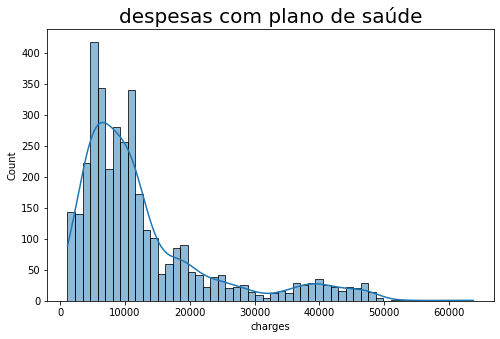

In [21]:
# Taxas dos seguros médicos 
# Histograma das taxas de seguro

plt.figure(figsize=(8,5))
sns.histplot(train_data["charges"], kde= True)
plt.title("despesas com plano de saúde", fontsize=20)
plt.show()